# Análisis de Procesamiento de Lenguaje Natural (PLN)

## Exercise 1
Dado el conjunto de datos de reseñas, podemos responder preguntas como:
- ¿Cuáles son los factores más importantes que generan críticas negativas?
- ¿Cuales son las tendencias en las opiniones de las personas segun la critica de la reseña?

Sin embargo, para responder preguntas más específicas, como:
- ¿Cuál es la tendencia de las críticas a lo largo del tiempo?
necesitaríamos datos adicionales como información temporal.

# Tokenizacion  #
Proceso en el cual se realiza la separacion por palabras de todos las reseñas. 


In [1]:
import nltk
import pandas as pd

nltk.download('punkt')
nltk.download('punkt_tab')

# Cargar el archivo CSV
data = pd.read_csv('../data/sdata.csv', nrows=5000)  
allReviews = data['text']  

tokesReview ={}#arreglo de tokens

for iterador, review in enumerate(allReviews):
    
    # Tokenizar la reseña
    tokens = nltk.word_tokenize(review)
    review_id = data.iloc[iterador]['review_id']

    # Asignar los tokens a su 'review_id' correspondiente
    tokesReview[review_id] = tokens

    # Incrementamos el iterador
    iterador += 1

[nltk_data] Downloading package punkt to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Exercise 2 #
Realizar un análisis exploratorio de los tamaños de las reseñas: encontrar la más corta y la más larga y trazar un histograma de la distribución de las longitudes de las reseñas.

Reseña más corta (longitud 6 palabras):
6

Reseña más larga (longitud 1105 palabras):
1105



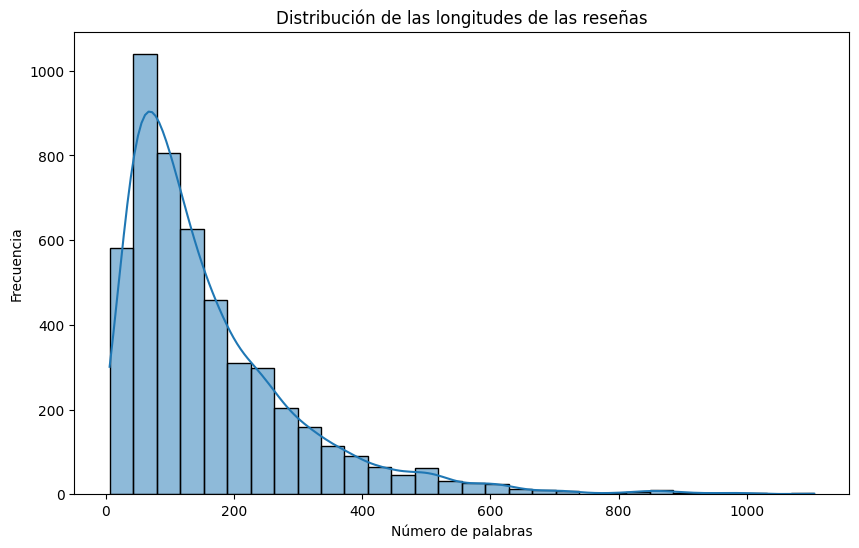

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir una nueva columna 'review_length' utilizando el diccionario 'tokesReview'
data['review_length'] = data['review_id'].apply(lambda review_id: len(tokesReview[review_id]))

# Encontramos la reseña más corta y la más larga y extraemos su tamaño
shortest_review = data.loc[data['review_length'].idxmin()]['review_length']
longest_review = data.loc[data['review_length'].idxmax()]['review_length']

print(f"Reseña más corta (longitud {data['review_length'].min()} palabras):\n{shortest_review}\n")
print(f"Reseña más larga (longitud {data['review_length'].max()} palabras):\n{longest_review}\n")

# Graficar el histograma de longitudes de reseñas
plt.figure(figsize=(10,6))
sns.histplot(data['review_length'], bins=30, kde=True)
plt.title("Distribución de las longitudes de las reseñas")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()


## Exercise 3
Crear una función `word_cloud_rating(data, star_value)` para construir una nube de palabras a partir de las reseñas que tienen un valor específico de estrellas. Visualizar los resultados para reseñas de 1 estrella.

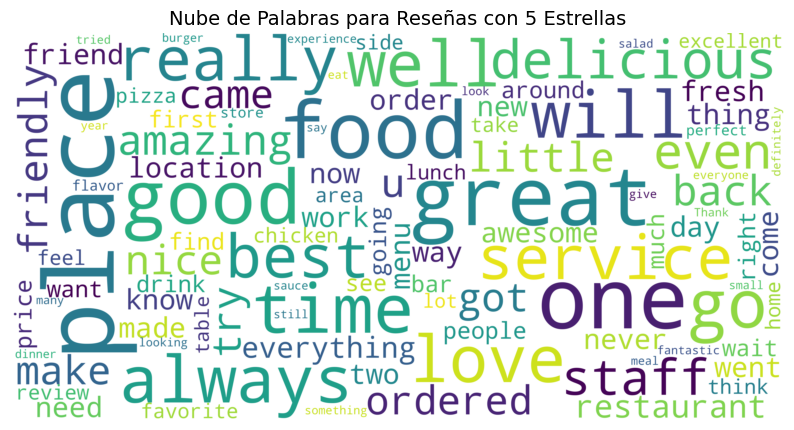

In [14]:
from wordcloud import WordCloud # Importar las bibliotecas necesarias

# Importar las bibliotecas necesarias
from wordcloud import WordCloud

# Definir la función word_cloud_rating
def word_cloud_rating(data, star_value):

    # Filtrar las reseñas que corresponden a un valor específico de estrellas
    subset_data = data[data['stars'] == star_value]
    
    # Unir todas las reseñas en un solo texto
    word_cloud_text = ' '.join(subset_data['text'])
    
    # Generar la nube de palabras
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=10, width=800, height=400).generate(word_cloud_text)
    
    # Visualizar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Nube de Palabras para Reseñas con {star_value} Estrellas', fontsize=14)
    plt.show()

# Llamar a la función para las reseñas de n estrellas
word_cloud_rating(data, 5)

## Exercise 4
Investigar por qué la palabra 'good' aparece con frecuencia en las reseñas negativas y proporcionar una explicación razonable.

# conclusion #
aunque se meustra la palabra "good" en las reseñas negativas, por los comentarios se puede dar un indicio que es por
*intentar realzar algun aspecto positivo
*confundirlo con un buen lugar

In [4]:
# Filtrar las reseñas de 1 estrella
negative_reviews = data[data['stars'] == 2]['text']

# Buscar las reseñas que contienen la palabra "good"
reviews_with_good = negative_reviews[negative_reviews.str.contains('good', case=False)]

# Imprimir algunas reseñas que contienen la palabra "good"
for i, review in enumerate(reviews_with_good):
    print(f"Reseña {i+1}:\n{review}\n")


Reseña 1:
Atmosphere for this restaurant is nice but service, not so much. 

Came here for a friend's birthday. Although, we made reservations and checked in a few minutes early, we still had to wait a good 45 minutes before sitting down at our table. When we made the reservations, we were informed we would have to leave a certain time - which we didn't think they would enforce, considering we did not get our table in time. However, they did, and we were not impressed.

The space in the restaurant is also very tight, my boyfriend got hit in the head a few times while sitting at the table.

I had ordered a seafood pasta dish, which was kind of bland (not much flavour). My boyfriend had ordered one of the specials of the night - filet mignon, which also was not up to par.

Overall, I've had better pasta. I'm not sure if it was just the two dishes I had that wasn't up to par, as my other friends did enjoy theirs.

Reseña 2:
Opened by Pickle Barrel, Glow is meant to be this new healthy eat

## Exercise 5
Encontrar todas las palabras de alta frecuencia (top 1%) y de baja frecuencia (bottom 1%) en las reseñas en general usando la función `Counter()` de la clase `collections`.

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.corpus import stopwords  # Asegúrate de importar el corpus de stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


#creamos un nuevo diccionario que almacena los tokens sin stopwords
tokesReview_clean={}

# Iterar sobre cada review_id y su lista de tokens
for review_id, tokens in tokesReview.items():
    # Filtrar las stopwords de los tokens para cada reseña
    tokens_clean = [word for word in tokens if word.lower() not in stop_words]
    
    # Almacenar los tokens limpios en el nuevo diccionario con el mismo review_id
    tokesReview_clean[review_id] = tokens_clean


# Convertir los tokens limpios de vuelta a texto
# Crear una columna nueva en el DataFrame con el texto limpio
data['text_clean'] = data['review_id'].apply(lambda review_id: ' '.join(tokesReview_clean[review_id]))




# Crear la matriz palabra-documento usando el texto limpio
vec = CountVectorizer()
X = vec.fit_transform(data['text_clean'])  # Aplicamos la vectorización a las reseñas 

# Convertir la matriz en un DataFrame para facilitar el análisis
word_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

# Contar la frecuencia total de cada palabra en todo el corpus
word_freq = Counter(dict(word_matrix.sum(axis=0)))

# Obtener el 1% superior e inferior de las palabras según su frecuencia
total_words = len(word_freq)
top_1_percent_count = int(total_words * 0.0001)
bottom_1_percent_count = int(total_words * 0.0001)

# Ordenar las palabras por frecuencia
sorted_words = word_freq.most_common()

# Top 1% palabras de alta frecuencia
top_1_percent_words = sorted_words[:top_1_percent_count]

# Bottom 1% palabras de baja frecuencia
bottom_1_percent_words = sorted_words[-bottom_1_percent_count:]

# Mostrar resultados
print("Top 1% palabras más frecuentes:")
for word, freq in top_1_percent_words:
    print(f"{word}: {freq}")

print("\nBottom 1% palabras menos frecuentes:")
for word, freq in bottom_1_percent_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package stopwords to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 1% palabras más frecuentes:
place: 2975
good: 2893

Bottom 1% palabras menos frecuentes:
évaluation: 1
éventuellement: 1


## Exercise 6
Escribir una función llamada `top_k_ngrams(word_tokens, n, k)` para imprimir los principales k n-gramas. Usar esta función para obtener los principales 10 1-gramas, 2-gramas y 3-gramas de las primeras 1000 reseñas.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
# Cargar el archivo CSV
data1 = pd.read_csv('../data/sdata.csv', nrows=1000)  # Cargar las primeras 1000 filas
allReviews1 = data1['text']  # Extraer la columna de texto

# Función para obtener los k n-grams más frecuentes
def top_k_ngrams(word_tokens, n, k):
    # Usamos CountVectorizer para generar los n-grams
    vec = CountVectorizer(ngram_range=(n, n))  # Para n-grams, usamos el rango (n, n)
    X = vec.fit_transform(word_tokens)
    
    # Obtener los nombres de los n-grams y sus frecuencias
    ngrams = vec.get_feature_names_out()
    ngram_counts = X.toarray().sum(axis=0)
    
    # Usar Counter para ordenar por frecuencia
    ngram_counter = Counter(dict(zip(ngrams, ngram_counts)))
    
    # Obtener los top k n-grams
    top_k = ngram_counter.most_common(k)
    
    # Mostrar los resultados
    for i, (ngram, count) in enumerate(top_k, 1):
        print(f"{i}. {ngram}: {count}")


# Llamamos a la función para obtener los top 10 1-grams, 2-grams y 3-grams
print("Top 10 1-grams:")
top_k_ngrams(allReviews1, 1, 10)
print("\nTop 10 2-grams:")
top_k_ngrams(allReviews1, 2, 10)
print("\nTop 10 3-grams:")
top_k_ngrams(allReviews1, 3, 10)


Top 10 1-grams:
1. the: 8630
2. and: 5592
3. to: 4414
4. it: 3334
5. was: 2897
6. of: 2878
7. is: 2038
8. in: 2034
9. for: 1932
10. that: 1898

Top 10 2-grams:
1. of the: 607
2. it was: 600
3. in the: 547
4. and the: 455
5. on the: 422
6. this place: 373
7. if you: 309
8. to the: 298
9. to be: 271
10. for the: 262

Top 10 3-grams:
1. if you re: 96
2. one of the: 81
3. the food is: 72
4. the food was: 72
5. this place is: 72
6. and it was: 70
7. the service was: 53
8. on the menu: 50
9. the first time: 49
10. in the area: 46


## Exercise 7.1
Filtrar todas las stop words en la primera reseña de los datos de Yelp y mostrar la respuesta, así como las stop words encontradas.

In [7]:

import nltk
from nltk.corpus import stopwords

# Descargar la lista de stop words
nltk.download('stopwords')

# Cargar las stop words en inglés
stop_words = set(stopwords.words("english"))

# Obtener la primera reseña
first_review = allReviews[0]

# Tokenizar la primera reseña
tokens = nltk.word_tokenize(first_review.lower())

# Filtrar tokens para eliminar stop words
filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
found_stopwords = [word for word in tokens if word in stop_words]

# Imprimir resultados
print("Tokens filtrados (sin stop words):", filtered_tokens)
print("Stop words encontradas en la reseña:", found_stopwords)



Tokens filtrados (sin stop words): ['super', 'simple', 'place', 'amazing', 'nonetheless', 'around', 'since', 'still', 'serve', 'thing', 'started', 'bologna', 'salami', 'sandwich', 'mustard', 'staff', 'helpful', 'friendly']
Stop words encontradas en la reseña: ['but', 'it', 'been', 'the', 'and', 'they', 'the', 'same', 'they', 'with', 'a', 'and', 'with', 'was', 'very', 'and']


[nltk_data] Downloading package stopwords to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exercise 7.2
Modificar la función `top_k_ngrams(word_tokens, n, k)` para eliminar las stop words antes de determinar los n-gramas.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pandas as pd

# Cargar el archivo CSV
data1 = pd.read_csv('../data/sdata.csv', nrows=1000)  # Cargar las primeras 1000 filas
allReviews1 = data1['text']  # Extraer la columna de texto

# Función para obtener los k n-grams más frecuentes, eliminando stop words
def top_k_ngrams(word_tokens, n, k):
    # Usamos CountVectorizer para generar los n-grams y eliminar stop words
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english')  # Para n-grams, usamos el rango (n, n)
    X = vec.fit_transform(word_tokens)
    
    # Obtener los nombres de los n-grams y sus frecuencias
    ngrams = vec.get_feature_names_out()
    ngram_counts = X.toarray().sum(axis=0)
    
    # Usar Counter para ordenar por frecuencia
    ngram_counter = Counter(dict(zip(ngrams, ngram_counts)))
    
    # Obtener los top k n-grams
    top_k = ngram_counter.most_common(k)
    
    # Mostrar los resultados
    for i, (ngram, count) in enumerate(top_k, 1):
        print(f"{i}. {ngram}: {count}")

# Llamamos a la función para obtener los top 10 1-grams, 2-grams y 3-grams
print("Top 10 1-grams:")
top_k_ngrams(allReviews1, 1, 10)
print("\nTop 10 2-grams:")
top_k_ngrams(allReviews1, 2, 10)
print("\nTop 10 3-grams:")
top_k_ngrams(allReviews1, 3, 10)



Top 10 1-grams:
1. place: 829
2. good: 715
3. food: 637
4. like: 604
5. just: 580
6. time: 547
7. ve: 503
8. really: 433
9. great: 431
10. little: 365

Top 10 2-grams:
1. las vegas: 43
2. pretty good: 42
3. food good: 40
4. feel like: 39
5. make sure: 38
6. staff friendly: 37
7. happy hour: 36
8. don know: 31
9. ice cream: 30
10. ve seen: 29

Top 10 3-grams:
1. las vegas strip: 8
2. half dozen times: 7
3. maps maps maps: 7
4. nearly 40 years: 7
5. staff friendly helpful: 7
6. vegas nearly 40: 7
7. clean staff friendly: 6
8. gluten free items: 6
9. just make sure: 6
10. lived vegas nearly: 6


## Exercise 8.1
Dividir los datos en 'buenas reseñas' (rating de estrellas mayor a 3) y 'malas reseñas' (rating de estrellas menor o igual a 3) y hacer un gráfico de barras de las 20 palabras principales en cada caso.

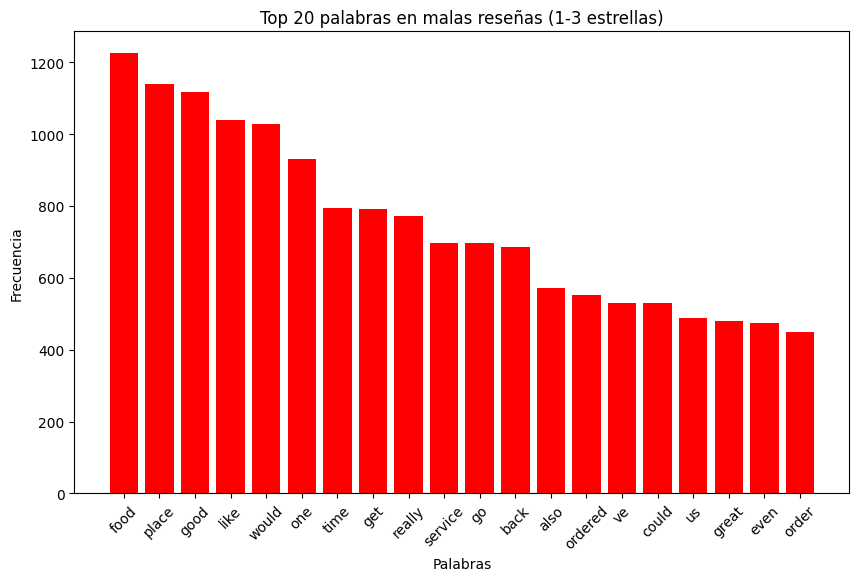

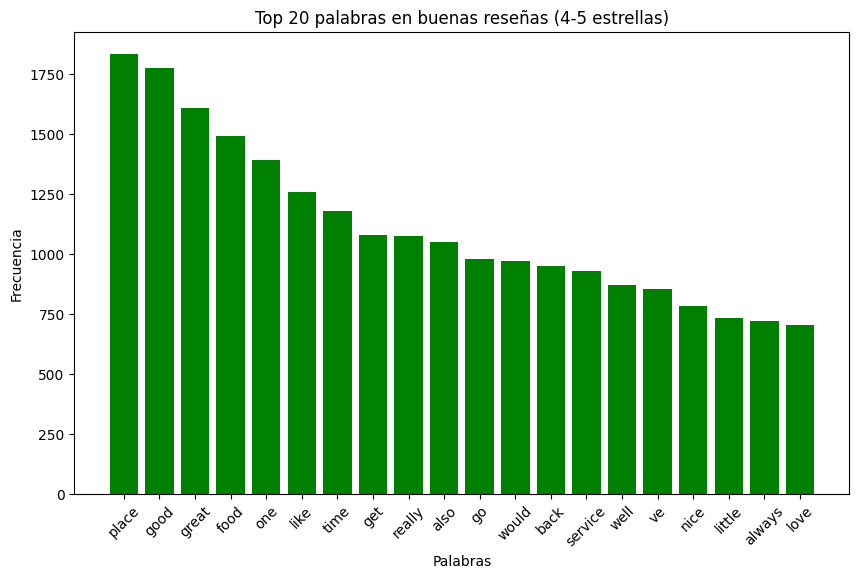

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

#Definir las reseñas malas y buenas (asumiendo que ya tienes la columna 'text_clean')
negative_reviews = data[data['stars'].isin([1, 2, 3])]['text_clean']
positive_reviews = data[data['stars'].isin([4, 5])]['text_clean']

#Crear el vectorizador para contar palabras, sin filtrar stopwords
vectorizer_neg = CountVectorizer(max_features=20)
vectorizer_pos = CountVectorizer(max_features=20)

#Transformar los textos de malas y buenas reseñas en matrices de frecuencias de palabras
X_neg = vectorizer_neg.fit_transform(negative_reviews)
X_pos = vectorizer_pos.fit_transform(positive_reviews)

#Extraer las palabras y sus frecuencias
neg_word_freq = X_neg.toarray().sum(axis=0)  # Sumar las frecuencias de las palabras para todas las malas reseñas
pos_word_freq = X_pos.toarray().sum(axis=0)  # Sumar las frecuencias de las palabras para todas las buenas reseñas

neg_words = vectorizer_neg.get_feature_names_out()
pos_words = vectorizer_pos.get_feature_names_out()

#Crear DataFrames con los resultados para facilitar la creación del gráfico
df_neg = pd.DataFrame({'word': neg_words, 'frequency': neg_word_freq}).sort_values(by='frequency', ascending=False)
df_pos = pd.DataFrame({'word': pos_words, 'frequency': pos_word_freq}).sort_values(by='frequency', ascending=False)

#Graficar las 20 palabras más frecuentes en malas y buenas reseñas

# Graficar malas reseñas
plt.figure(figsize=(10, 6))
plt.bar(df_neg['word'], df_neg['frequency'], color='red')
plt.title('Top 20 palabras en malas reseñas (1-3 estrellas)')
plt.xticks(rotation=45)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

# Graficar buenas reseñas
plt.figure(figsize=(10, 6))
plt.bar(df_pos['word'], df_pos['frequency'], color='green')
plt.title('Top 20 palabras en buenas reseñas (4-5 estrellas)')
plt.xticks(rotation=45)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()


## Exercise 8.2
Usar la función `get_top_n_words()` para encontrar los 20 principales bigramas y trigramas (en malas y buenas reseñas). Evaluar si los resultados son útiles.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_n_words(corpus, n=None, ngram_range=(1, 1)):
    """
    Obtiene los 'n' n-gramas más frecuentes de un corpus dado.
    
    :param corpus: Lista de textos a procesar
    :param n: Número de n-gramas a devolver
    :param ngram_range: Rango de n-gramas a considerar, por ejemplo (2,2) para bigramas, (3,3) para trigramas
    :return: Un DataFrame con los n-gramas más comunes y sus frecuencias
    """
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    
    # Extraer las palabras (n-gramas) y sus frecuencias
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Ordenar por frecuencia y devolver las 'n' más comunes
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return pd.DataFrame(words_freq[:n], columns=['N-gram', 'Frequency'])


# Bigramas de malas reseñas
top_bigrams_neg = get_top_n_words(negative_reviews, n=20, ngram_range=(2, 2))
print("Top 20 Bigramas en malas reseñas:")
print(top_bigrams_neg)

# Trigramas de malas reseñas
top_trigrams_neg = get_top_n_words(negative_reviews, n=20, ngram_range=(3, 3))
print("Top 20 Trigramas en malas reseñas:")
print(top_trigrams_neg)


# Bigramas de buenas reseñas
top_bigrams_pos = get_top_n_words(positive_reviews, n=20, ngram_range=(2, 2))
print("Top 20 Bigramas en buenas reseñas:")
print(top_bigrams_pos)

# Trigramas de buenas reseñas
top_trigrams_pos = get_top_n_words(positive_reviews, n=20, ngram_range=(3, 3))
print("Top 20 Trigramas en buenas reseñas:")
print(top_trigrams_pos)


Top 20 Bigramas en malas reseñas:
              N-gram  Frequency
0   customer service        107
1            go back         86
2        pretty good         82
3          come back         76
4         first time         75
5         happy hour         67
6          food good         62
7          feel like         59
8        even though         58
9    nothing special         54
10        20 minutes         50
11       tasted like         49
12         next time         48
13          would go         48
14         make sure         47
15   would recommend         47
16           ve ever         44
17        every time         40
18          ve never         40
19       really good         39
Top 20 Trigramas en malas reseñas:
                    N-gram  Frequency
0            would go back         20
1          would come back         18
2       nothing write home         14
3               ce est pas         13
4              qu il avait         11
5        go somewhere else     

## Exercise 9.1
Observar que muchos de los importantes bigramas 'malos' incluyen las palabras 'like' o 'just'. Dar ideas sobre cómo utilizar esta observación en el futuro preprocesamiento de las reseñas.

Palabras como "like" o "just" aparecen en bigramas de reseñas negativas, pero no parecen ser informativas. Ejemplos: "felt like", "food just". Estas palabras pueden ser filtradas de los bigramas para mejorar la calidad de los resultados.

Ideas para futuros pasos de pre-procesamiento:

Stop words personalizadas: Crear una lista de palabras que no son útiles para el análisis, como "like" o "just", y filtrarlas junto con las stop words comunes.
Eliminación de bigramas con ciertas palabras: Identificar bigramas que incluyen palabras poco informativas y excluirlas del análisis.

## Exercise 9.2
1. Escribir una queja que probablemente no se capte completamente mediante el análisis de bigramas.
2. Escribir un paso de procesamiento que solucione este problema.

Queja que no se puede detectar completamente con bigramas:
Ejemplo: "My hamburger was served cold."
Este tipo de queja se enfoca en un problema de temperatura que un análisis de bigramas no captaría en su totalidad.
Paso de procesamiento sugerido:
Análisis de sentimiento: Utilizar un análisis de sentimiento para capturar términos subjetivos como "cold", "overcooked", etc., que indican problemas específicos con la comida o servicio.
Clasificación semántica: Incluir técnicas como el topic modeling (modelo de temas) para identificar quejas frecuentes, como problemas de temperatura o calidad del servicio, a partir de un análisis semántico más amplio.